<a href="https://colab.research.google.com/github/mzignis/cats_vs_dogs/blob/master/prepare_data_dirs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dogs vs cats notebook

In [ ]:
HOME = '/content/drive/My Drive/ml_competition/dogs_vs_cats'
%cd $HOME

/content/drive/My Drive/ml_competition/dogs_vs_cats


In [ ]:
%pip install tqdm

In [ ]:
import os
import shutil

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from PIL import Image
from tqdm import tqdm

In [ ]:
sns.set()

## Explore data

In [ ]:
train_dir = os.path.join(HOME, 'data', 'train')

In [ ]:
train_pictures = [os.path.join(train_dir, x) for x in os.listdir(train_dir)]
len(train_pictures)

25160

In [ ]:
cat_picutures = [x for x in train_pictures if 'cat' in os.path.basename(x)]
len(cat_picutures)

12582

In [ ]:
dog_picutures = [x for x in train_pictures if 'dog' in os.path.basename(x)]
len(dog_picutures)

12578

### Inspect images

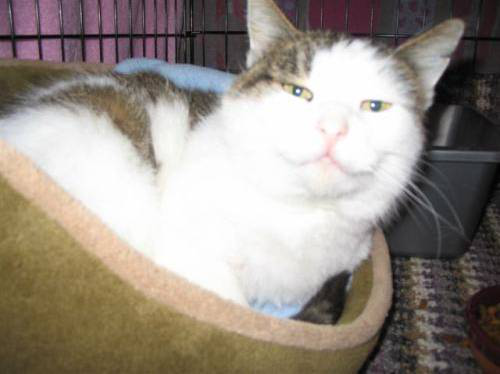

In [ ]:
image = Image.open(cat_picutures[321])
image

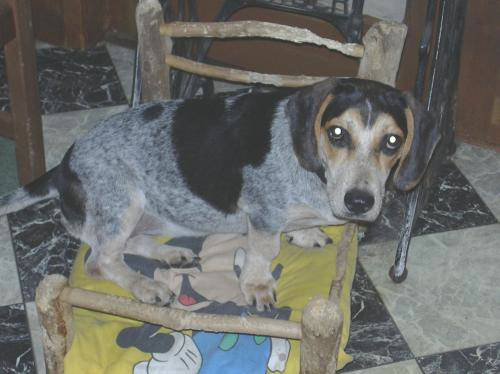

In [ ]:
image = Image.open(dog_picutures[184])
image

### Divide pictures into training, validation and test sets

In [ ]:
validation_set_size = 2000
test_set_size = 500

In [ ]:
np.random.shuffle(train_cat_picutures)
train_cat_picutures[:10]

['/content/drive/My Drive/ml_competition/dogs_vs_cats/data/train/cat.11745.jpg',
 '/content/drive/My Drive/ml_competition/dogs_vs_cats/data/train/cat.10516.jpg',
 '/content/drive/My Drive/ml_competition/dogs_vs_cats/data/train/cat.10479.jpg',
 '/content/drive/My Drive/ml_competition/dogs_vs_cats/data/train/cat.8811.jpg',
 '/content/drive/My Drive/ml_competition/dogs_vs_cats/data/train/cat.1149.jpg',
 '/content/drive/My Drive/ml_competition/dogs_vs_cats/data/train/cat.6707.jpg',
 '/content/drive/My Drive/ml_competition/dogs_vs_cats/data/train/cat.5794.jpg',
 '/content/drive/My Drive/ml_competition/dogs_vs_cats/data/train/cat.8534.jpg',
 '/content/drive/My Drive/ml_competition/dogs_vs_cats/data/train/cat.4013.jpg',
 '/content/drive/My Drive/ml_competition/dogs_vs_cats/data/train/cat.12351.jpg']

In [ ]:
np.random.shuffle(train_dog_picutures)
train_dog_picutures[:10]

['/content/drive/My Drive/ml_competition/dogs_vs_cats/data/train/dog.10188.jpg',
 '/content/drive/My Drive/ml_competition/dogs_vs_cats/data/train/dog.12072.jpg',
 '/content/drive/My Drive/ml_competition/dogs_vs_cats/data/train/dog.8927.jpg',
 '/content/drive/My Drive/ml_competition/dogs_vs_cats/data/train/dog.1731.jpg',
 '/content/drive/My Drive/ml_competition/dogs_vs_cats/data/train/dog.4710.jpg',
 '/content/drive/My Drive/ml_competition/dogs_vs_cats/data/train/dog.682.jpg',
 '/content/drive/My Drive/ml_competition/dogs_vs_cats/data/train/dog.10597.jpg',
 '/content/drive/My Drive/ml_competition/dogs_vs_cats/data/train/dog.502.jpg',
 '/content/drive/My Drive/ml_competition/dogs_vs_cats/data/train/dog.8241.jpg',
 '/content/drive/My Drive/ml_competition/dogs_vs_cats/data/train/dog.4521.jpg']

In [ ]:
validation_cat_pictures = cat_picutures[:validation_set_size]
test_cat_pictures = cat_picutures[validation_set_size:validation_set_size + test_set_size]
train_cat_pictures = cat_picutures[validation_set_size + test_set_size:]

len(validation_cat_pictures), len(test_cat_pictures), len(train_cat_pictures)

(2000, 500, 10082)

In [ ]:
validation_dog_pictures = dog_picutures[:validation_set_size]
test_dog_pictures = dog_picutures[validation_set_size:validation_set_size + test_set_size]
train_dog_pictures = dog_picutures[validation_set_size + test_set_size:]

len(validation_dog_pictures), len(test_dog_pictures), len(train_dog_pictures)

(2000, 500, 10078)

### Moving sets into separate directories

In [ ]:
base_dir = os.path.join(HOME, 'data')

In [ ]:
validation_dir = os.path.join(base_dir, 'validation')
validation_cat_dir = os.path.join(validation_dir, 'cat')
validation_dog_dir = os.path.join(validation_dir, 'dog')

if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)

if not os.path.exists(validation_cat_dir):
    os.mkdir(validation_cat_dir)

if not os.path.exists(validation_dog_dir):
    os.mkdir(validation_dog_dir)

In [ ]:
test_dir = os.path.join(base_dir, 'test')
test_cat_dir = os.path.join(test_dir, 'cat')
test_dog_dir = os.path.join(test_dir, 'dog')

if not os.path.exists(test_dir):
    os.mkdir(test_dir)

if not os.path.exists(test_cat_dir):
    os.mkdir(test_cat_dir)

if not os.path.exists(test_dog_dir):
    os.mkdir(test_dog_dir)

In [ ]:
train_dir = os.path.join(base_dir, 'train')
train_cat_dir = os.path.join(train_dir, 'cat')
train_dog_dir = os.path.join(train_dir, 'dog')

if not os.path.exists(train_dir):
    os.mkdir(train_dir)

if not os.path.exists(train_cat_dir):
    os.mkdir(train_cat_dir)

if not os.path.exists(train_dog_dir):
    os.mkdir(train_dog_dir)

In [ ]:
def copy_pictures(pictures, dst_folder):
    for picture in tqdm(pictures):
        if not os.path.exists(picture):
            continue
        shutil.copy(picture, os.path.join(dst_folder, os.path.basename(picture)))
        os.remove(picture)

In [ ]:
copy_pictures(validation_cat_pictures, validation_cat_dir)

In [ ]:
copy_pictures(test_cat_pictures, test_cat_dir)

100%|██████████| 500/500 [03:07<00:00,  2.67it/s]


In [ ]:
copy_pictures(train_cat_pictures, train_cat_dir)

100%|██████████| 10082/10082 [1:56:47<00:00,  1.44it/s]


In [ ]:
copy_pictures(validation_dog_pictures, validation_dog_dir)

100%|██████████| 2000/2000 [18:59<00:00,  1.75it/s]


In [ ]:
copy_pictures(test_dog_pictures, test_dog_dir)

100%|██████████| 500/500 [05:26<00:00,  1.53it/s]


In [ ]:
copy_pictures(train_dog_pictures, train_dog_dir)

 65%|██████▍   | 6541/10078 [1:36:37<2:32:42,  2.59s/it]